### Now that we have seen both classification and regression models

### We also have seen how to measure model performanace

### We have also seen how to tune our model and hyperparameters and choose best performing model

### But most data would require some or other preprossesing before feeding into training

- The reason for this maybe because the data is untidy
- The data may be of different format
- data is of a incompatible format (Categorical)

## Dealing with Categorical varaibles

- scikit-learn will not accept categorical variable in its features (Inputs)
- Hence we would need to numerically encode them
- We create a few variables (One for each distinct value in categorical variable) 
and assign 1 or 0 value - these are called as dummy variables
- as shown below
![dummy var handling](dummyvar.png)

## Dealing with Categorical variables in python

- In Scikit-learn we have a OneHotEncoder() function
- In pandas we have a get_dummies() function


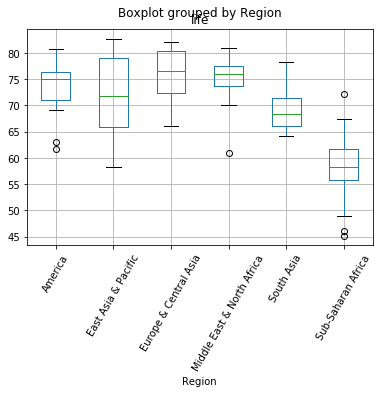

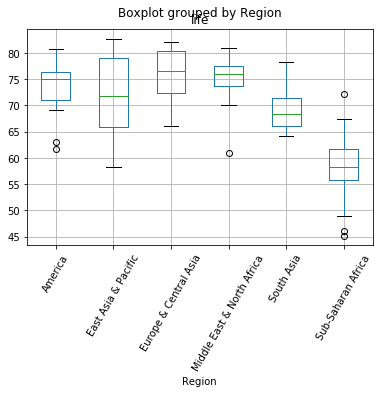

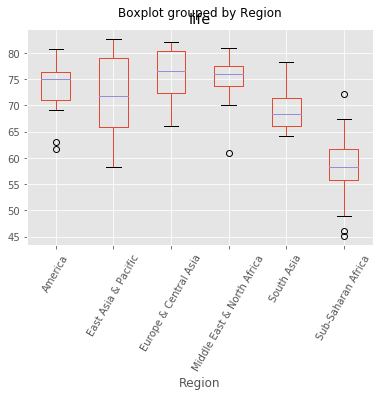

In [3]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

'Region' feature contains very useful information that can predict life expectancy. 
For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. 
Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. 
To do this, you need to binarize it by creating dummy variables

In [4]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

In [6]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [20]:
df_region.iloc[:,[7]].head()

,life
0,75.3
1,58.3
2,75.5
3,72.5
4,81.5


In [22]:
df_region.iloc[:,[0,1,2,3,4,5,6,8,9]].head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region_East Asia & Pacific
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0,0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2,1


In [23]:
X = df_region.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13]].values
y = df_region.iloc[:,[7]].values

In [24]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha = 0.5, normalize = True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv = 5)

# Print the cross-validated scores
print(ridge_cv)


[ 0.86808336  0.80623545  0.84004203  0.7754344   0.87503712]


# Handling NULL or empty

- Lets look at the pima indians dataset which has nulls in a different way

![Hidden Nulls](nulls_how.png)

- lets make it nans

df.replace(0, np.nan, inplace = True)

- then we may lose a lot of data but it is a good method

- impute the data

from sklearn.preprossesing import Imputer<br>
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)<br>
imp.fit(X)<br>
X = imp.transform(X)<br>

- These kind of methods which can transform the data or contain a transform method is called as a 'Transformer'


- But why fit a transform once and then fit our model later Can we do both in a single step?

- yes thats where we use scikit-learn's pipeline object

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

logreg = LogisticRegression()

steps = [('imputation',imp),
         ('Logistic_regression',logreg)]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

pipeline.score(X_test, y_test)



In [ ]:
# Use Voting Dataset

# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


In [ ]:
When many values in your dataset are missing, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in.

In [ ]:
there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same .fit() and .predict() methods as before.

In [ ]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

In [ ]:
# a Congressman's party affiliation. Dataset

# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))
